In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

In [2]:
# おまじない
%load_ext autoreload
%autoreload 2

In [3]:
# olrprobust_3はリカッチのif文を削除した
# olrprobust_2との相違点は上記があるか、ないか
from olrprobust_3_using import olrp,olrprobust,doubleo

# olrprobust_2はリカッチのif文有〼
# matlabを極力そのまま移し替えた。
#from olrprobust_2_using import olrp, olrprobust, doubleo

# olrprobust_1はgithubから
#from olrprobust_1_using import olrp,olrprobust,doubleo

In [4]:
mu_d = 13.0
rho = 0.05
gan = 9.0
c_d = 1.0
beta = 0.95

R = 1 / beta

In [5]:
A = np.array([[1.0, 0.0], [(1.0 - rho) * mu_d, rho]])
C = np.array([[0.0], [c_d]])

# ここでは使わない
G = np.array([[0.0, 1.0]])
G_1 = np.array([[1.0, 0.0]])

### 2
- 家計はlinear state transition lawに従う。
$$
\begin{equation}
    y_{t+1}=A y_t+B u_t+C \check{\epsilon}_{t+1}
    \end{equation}
$$

- misspecifiedをどう表現するかが問題。
- \epsilonは近似誤差しか表現できない。
- そこで以下のように書き換える。
$$
\begin{equation}
    y_{t+1}=A y_t+B u_t+C\left(\epsilon_{t+1}+w_{t+1}\right) 
    \end{equation}
$$
- $w_{t+1}$を加えることにより動的にmisspecificationを捉えることができる。
- 上2式の近さを示すために以下の式がある。
$$
\begin{equation}
    E_0 \sum_{t=0}^{\infty} \beta^{t+1} w_{t+1}^{\prime} w_{t+1} \leq \eta_0 
    \end{equation}
$$

### Dynamic programming without model misspecification
- 今回考えるのはuncertaintyがない場合なので、使用するのは$y_{t+1}=A y_t+B u_t+C \check{\epsilon}_{t+1}$
- one-priod ross function を以下で定義。
$$\begin{equation}
    r(y, u)=-\left(y^{\prime} Q y+u^{\prime} R u\right) \nonumber
    \end{equation}$$

- optimal linear regulator problemは以下のように表現される。
$$\begin{equation}
    -y_0 P y_0-p=\max _{\left\{u_t\right\}_{t=0}^{\infty}} E_0 \sum_{t=0}^{\infty} \beta^t r\left(y_t, u_t\right), \quad 0<\beta<1 
    \end{equation}$$

- $y^*$を$y$の次の値とすると以下のbellman方程式を意味する。
   $$ \begin{equation}
        -y^{\prime} P y-p=\max _u E\left[r(y, u)-\beta y^{* \prime} P y^*-\beta p\right] \mid y 
        \end{equation}$$


    - $P$はriccati方程式のfixed pointで以下のように表現される。
    $$P=Q+\beta A^{\prime} P A-\beta^2 A^{\prime} P B\left(R+\beta B^{\prime} P B\right)^{-1} B^{\prime} P A$$
    - optimal decision ruleは$u_t=-F y_t$と表され、$F$は以下を満たす。
    $$F=\beta\left(R+\beta B^{\prime} P B\right)^{-1} B^{\prime} P A$$
    - $P$は反復法を用いて解く。

- ここで$p$は$p =\frac{\beta}{1-\beta} \operatorname{trace} P C C^{\prime}$で与えられる。
    - $C$は$p$にのみ影響し、$P$には関係しない。
    - ということは$C \neq 0$(確率的)、$C = 0$(非確率的)な場面でも$u_t=-F y_t$が適応される
    - だからなんやねん

### robust control problems
- 次にuncertainty付のやつを考えてみよう。$ y_{t+1}=A y_t+B u_t+C\left(\epsilon_{t+1}+w_{t+1}\right) $
- これにしたがって以下の効用を最大化するものを考える。
    $$
    \max _{\left\{u_t\right\}_{t=0}^{\infty}} \min _{\left\{w_{t+1}\right\}_{t=0}^{\infty}} E_0 \sum_{t=0}^{\infty} \beta^t\left\{r\left(y_t, u_t\right)+\beta \theta w_{t+1}^{\prime} w_{t+1}\right\}$$
 
    - $\theta \in(\underline{\theta},+\infty]$であるが、これは下限を設定しないと効用を$- \infty$まで持って行けちゃうから、つまりロバスト性を考える意味がなくなってしまう。

- 次に$-y_0^{\prime} P y_0-p$を効用のvalueとする。
- すると前述したものと同様の考え方から以下のベルマン方程式が成立。
$$ -y^{\prime} P y-p=\max _u \min _w E\left\{r(y, u)+\theta \beta w^{\prime} w-\beta y^{* \prime} P y^*-\beta p\right\}$$
- 要約すると、ロバスト線形レギュレータがモデルno-uncertaintyを、uncertaintyがあるモデルに置き換えられることを意味している。

### Analyzing the Bellman Equation
skip

###  A simple algorithm
- 以下の式を簡単にする。
    $$ -y^{\prime} P y=\max _u \min _w E\left\{r(y, u)+\theta \beta w^{\prime} w-\beta y^{* \prime} P y^*\right\}$$

\begin{equation}
\begin{aligned}
& \bar{B}=\left[\begin{array}{ll}
B & C
\end{array}\right] \\
& \bar{R}=\left[\begin{array}{cc}
R & 0 \\
0 & -\beta \theta I
\end{array}\right] \\
& \bar{u}_\iota=\left[\begin{array}{c}
u_\iota \\
w_{\ell+1}
\end{array}\right]
\end{aligned}
\end{equation}

- したがってベルマン方程式は以下のように書き直すことができる。
\begin{equation}
-y^{\prime} P y=\operatorname{ext}_{\tilde{u}}\left\{-y^{\prime} Q y-\tilde{u}^{\prime} \tilde{R} \tilde{u}-\beta y^{* \prime} P y^*\right\}
\end{equation}

- ricattiは
\begin{equation}
P=Q+\beta A^{\prime} P A-\beta^2 A^{\prime} P \tilde{B}\left(\tilde{R}+\beta \tilde{B}^{\prime} P \tilde{B}\right)^{-1} \tilde{B}^{\prime} P A
\end{equation}

\begin{equation}
\tilde{F}=\beta\left(\tilde{R}+\beta \tilde{B}^{\prime} P \tilde{B}\right)^{-1} \tilde{B}^{\prime} P A
\end{equation}


### permanet income model
- 通常このモデルに消費者は疑問を持たないが、ロバスト性を考慮に入れるとある時点において一時的にそのモデルに従わず、独自の行動を取ってしまう。(モデルに疑いを持つということ。)
- 言い換えると misspesification のために消費者が将来の収入予測を慎重に行うようになり、endowment の誤差に対する懸念がない場合と比べて消費プロファイルを将来に向けて傾ける形で予防貯蓄を始める。
- 要約すると、現在の消費を抑え、貯蓄を増やす行動を取るということ。

###  model
-  $\{d_t\}$のendowmentを受け取り、消費$c_t$と貯蓄$k_t$にうまい具合に割り当てることで最適化を図ろうとし、それは以下の条件を最大化することによって達成される。
\begin{equation}
-E_0 \sum^{\infty} \beta^t\left(c_t-b\right)^2, \beta \in(0,1)
\end{equation}

\begin{align}
k_t+c_t & =R k_{t-1}+d_t \\ 
d_{t+1} & =\mu_d(1-\rho)+\rho d_t+c_d\left(\epsilon_{t+1}+w_{t+1}\right)
\end{align}

- ポンジ・スキーム->無限借り入れを禁止。
\begin{equation}
\mathbb{E}_0\left[\sum_{t=0}^{\infty} \beta^t k_t^2\right]<\infty
\end{equation}

### no-uncertainty
- 差分方程式からダイナミックにconsumptionを求めるやり方を示す。
- 以前導出したので割愛

In [6]:
# Use the above formulas to create the optimal policies for b_{t+1} and c_t

b_pol = G @ (np.eye(2, 2) - (R - 1) * beta * la.inv(np.eye(2, 2) - beta * A))

# 効用込み
c_pol_utility = (R - 1) * (
    beta * G @ la.inv(np.eye(2, 2) - beta * A) - gan / (R - 1) * G_1
)
c_pol_c = (R - 1) * beta * G @ la.inv(np.eye(2, 2) - beta * A)
# Create the A matrix for a LinearStateSpace instance
A_LSS1 = np.vstack([A, b_pol])
A_LSS2 = np.array([0.0, 0.0, 1.0]).reshape(-1, 1)
A_LSS = np.hstack([A_LSS1, A_LSS2])

# Create the C matrix for LSS methods
C_LSS = np.vstack([C, np.zeros(1)])

# Create the G_c matrix for LSS methods
G_LSS1_c = np.vstack([G, c_pol_c])
G_LSS2_c = np.vstack([np.zeros(1), R - 1])
G_LSS_c = np.hstack([G_LSS1_c, G_LSS2_c])

# Create the G_utirity matrix for LSS methods
G_LSS1_uti = np.vstack([G, c_pol_utility])
G_LSS2_uti = np.vstack([np.zeros(1), R - 1])
G_LSS_uti = np.hstack([G_LSS1_uti, G_LSS2_uti])


In [7]:
c_pol_utility

array([[3.3175853 , 0.05249344]])

### using LQR
- 遷移式を一つにまとめる。

\begin{equation}
\begin{aligned}
\left[\begin{array}{c}
1 \\
k_t \\
d_{t+1}
\end{array}\right]
&=
\left[\begin{array}{ccc}
1 & 0 & 0 \\
-b & R & 1 \\
(1-\rho) \mu_d & 0 & \rho
\end{array}\right]
\left[\begin{array}{c}
1 \\
k_{t-1} \\
d_t
\end{array}\right]
\\
&+
\left[\begin{array}{l}
0 \\
1 \\
0
\end{array}\right]
(b-c_t)
+
\left[\begin{array}{c}
0 \\
0 \\
c_d
\end{array}\right]
(\epsilon_{t+1}+w_{t+1})
\end{aligned}
\end{equation}

-  目的関数より、$r(y, u) = -y^T R y - u^T Q u$ と設定する。
    - $R=0_{3 \times 3}$と、$Q=1$である。
    - 但しポンジ・スキームに対処できていない為、adding a small entry $\epsilon>0$ in the $(4,4)$ position of $R$.

In [8]:
Q = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1e-9]])
A = np.array([[1.0, 0.0, 0.0], [(1.0 - rho) * mu_d, rho, 0.0], [-gan, 1.0, R]])
B = np.array([[0.0], [0.0], [-1.0]])
C = np.array([[0.0], [c_d], [0.0]])
R_hyouka = np.array([[1]])
F_ro2, K_ro2, P_ro2, Pt_ro2 = olrprobust(beta, A, B, C, Q, R_hyouka, -1e-9)

In [9]:
iter_t = 150
d_0 = 0.0

np.random.seed(5)
eps = np.random.randn(iter_t)
print(eps[100])
y = np.array([[1.0, 0.0, 0.0]])
# print(y[0])
# print(y.shape)
ABF_1 = A - np.dot(B, F_ro2)
for i in range(iter_t):
    # print(i)
    # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # Tmp = A -np.dot(B,F) + np.dot(C,K)
    # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
    # print(y)
    # print(y.shape)
    y = np.insert(y, 0, np.dot(ABF_1, y[0].T) + C.T * eps[i], axis=0)
    if i == 0:
        y[0][2] = 0


0.7924226173066341


In [10]:
y_1 = y[::-1]
k_get_1 = y[:, 2]
d_get_1 = y[:, 1]

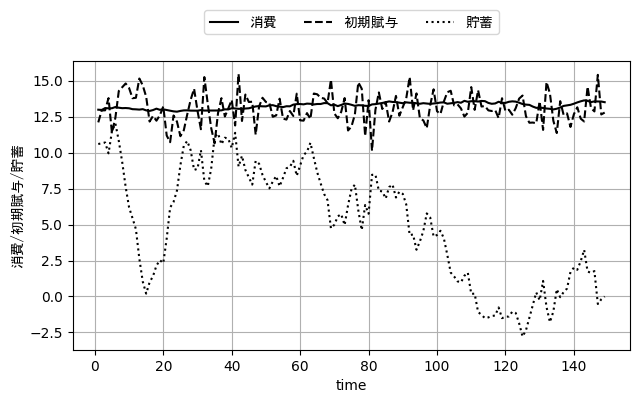

In [11]:
c = np.zeros(iter_t + 1)
# print("c size before %d"%c.shape)

for i in range(1, iter_t):
    # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    # print(i)
    # print(y[i])
    c[i] = -F_ro2 @ y_1[i] + gan
    # print("c = %d"%c[i])

# print(c.shape)
plt.figure(figsize=[6.5, 4.2])

# Plot consumption
plt.plot(
    np.array(range(1, iter_t)),
    c[1:iter_t],
    linestyle="-",
    label="消費",
    color="black",
)

# Plot endowment
plt.plot(
    np.array(range(1, iter_t)),
    d_get_1[1:iter_t],
    linestyle="--",
    label="初期賦与",
    color="black",
)

# Plot saving
plt.plot(
    np.array(range(1, iter_t)),
    k_get_1[1:iter_t],
    linestyle=":",
    label="貯蓄",
    color="black",
)

# Legend with specified arguments
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.2),
    ncol=3,
    prop={"family": "MS Gothic", "size": 10},
)
plt.xlabel("time", fontsize=10)
plt.ylabel("消費/初期賦与/貯蓄", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()
